<a href="https://colab.research.google.com/github/alwaysneedhelp/Practice-for-IOAI/blob/main/iris_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import matplotlib.colors as mcolors

In [2]:
data = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)

In [3]:
data.drop(['sepal length (cm)',	'sepal width (cm)'], inplace=True, axis=1)

In [4]:
data.columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [5]:
def train_and_vis(data, n, params):
  if 'cluster' in data.columns:
    data.drop('cluster', inplace=True, axis=1)
  km = KMeans(n_clusters=n)
  clusters = km.fit_predict(data)
  data['cluster'] = clusters
  for a in range(n):
    cls = data[data['cluster']==a]
    plt.scatter(cls[params[0]], cls[params[1]], color = f'C{a}')
  plt.legend([f'{i}th class' for i in range(n)])

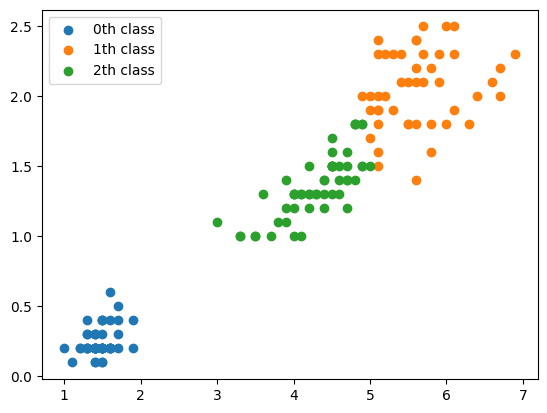

In [6]:
params = ['petal length (cm)', 'petal width (cm)']
train_and_vis(data, 3, params)

In [7]:
scaler = MinMaxScaler()
data[['petal length (cm)']] = scaler.fit_transform(data[['petal length (cm)']])
data[['petal width (cm)']] = scaler.fit_transform(data[['petal width (cm)']])

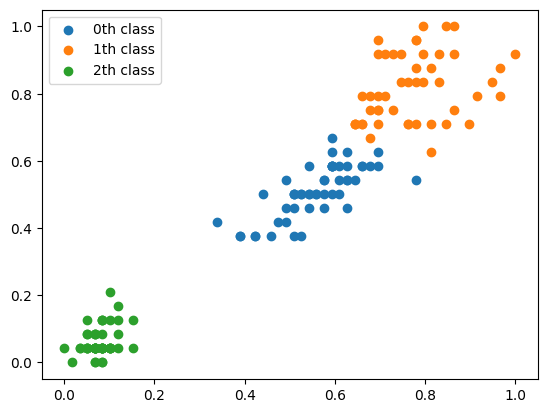

In [8]:
train_and_vis(data, 3, params)

In [9]:
sse = []
rng = range(1,10)
for i in rng:
  km = KMeans(n_clusters=i)
  km.fit(data)
  sse.append(km.inertia_)

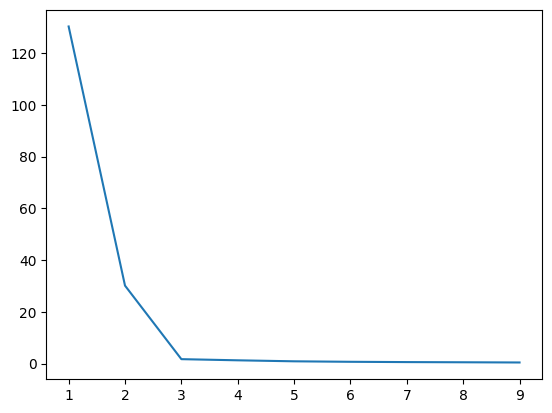

In [10]:
plt.plot(rng, sse)